In [68]:
import pandas as pd
import numpy as np
import math
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df = df.T
df

mean = list(df.mean())

std = list(df.std())

yerr_ = []

thread_hold = 42000

for i in range (4) :
    yerr_.append(1.96*(std[i]/math.sqrt(len(df))))


In [69]:
def draw_barchart(thread_hold):
    for yerr, bars in zip(yerr_, barchart.get_children()):
        h = bars.get_height()
        if (h-yerr > thread_hold):
            bars.set_color('red')
        if (h+yerr < thread_hold):
            bars.set_color('blue')
        if ((h+yerr >= thread_hold) & (h-yerr <= thread_hold)):
            bars.set_color('#efefef')
    plt.xticks(range(len(df.columns)), df.columns)
    plt.ylim(0,60000)

def draw_line():
    plt.gca()
    plt.axhline(thread_hold, color = 'black', lw = 2)
    
def onclick(event):
    drawplot(event.ydata)
    drawline(event.ydata)
    yval = event.ydata
        

<IPython.core.display.Javascript object>


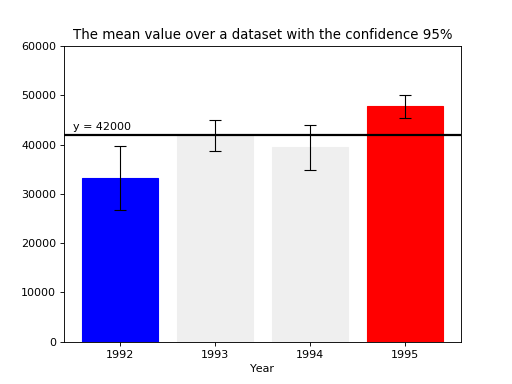

In [71]:
fig = plt.figure()
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

barchart = plt.bar(range(len(df.columns)),
        yerr = yerr_,
        height = mean,
        align = 'center',
        error_kw=dict(ecolor='black', lw=1, capsize=5, capthick=1)) 
draw_line()
draw_barchart(thread_hold)
plt.xlabel('Year')
plt.title('The mean value over a dataset with the confidence 95%')
plt.text(-0.5, 43000, 'y = {}'.format(thread_hold))
plt.savefig('asignment3.png')
